# Ilościowe dopasowanie Par Sekwencji  - algorytm N-W

## Wymagania programu 

    1. Możliwość wczytania sekwencji:
        • ręczne,
        • z pliku w formacie FASTA
    2. Możliwość wyboru punktacji za zgodność i niezgodność liter oraz kar za przerwy
    3. Wygenerowanie JEDNEJ ścieżki optymalnego dopasowania
        • wyświetlenie razem z parametrami programu, punktacją, długością dopasowania procentem pozycji identycznych i przerw
        • zapisem wyniku do pliku w formacie tekstowym
    4. Graficzne wyświetlenie tablicy punktacji wraz z optymalną ścieżką.

### Możliwość wczytania sekwencji:
        • ręczne

In [4]:
# Convering FASTA file sequence to String
# Args: filename (String) - path to FASTA file
# Returns: bialko (String) - protein sequence
# Computational complexity: O(n)
def readProtein(fileName):
    file = open(fileName, 'r')
    i = 0
    bialko = ''
    for each in file:
        if i !=0: 
            bialko += each
        i+=1
    return bialko.replace("\n" , "")
   

        • z pliku w formacie FASTA

In [5]:
# Check if provided String contains only DNA sequence
# Args: dna (String) - dna sequence
# Returns: boolean - if provided dna sequence is dna
# Computational complexity: O(n^2)
def ifDna(dna):
    return not len(tuple(filter(lambda letter: letter.upper() not in ('A','G','C','T'), dna)))

In [6]:
# Manualy input dna sequence an check if data is correct
# Args: 
# Returns: data (string) - dna sequence
def inputDna():
    data = input("Please provide a squence of DNA: ") 
    if ifDna(data):
        return data.upper()
    else:
        print ("Wrong dna provided!")

### Możliwość wyboru punktacji za zgodność i niezgodność liter oraz kar za przerwy

In [59]:
# Setting esensial parameters to NW algorithm 
# Args: 
# Returns: gap (float) - gap punishment
#          match (float) - match reward
#          mismatch (float) - mismatch punishment
# Computational complexity: O(3)
def setParams():
    i = 0
    while True:
        try:
            if (i==3):
                break
            gap = float(input('Provide gap: '))
            match = float(input('Provide mathch: '))
            mismatch = float(input('Provide mismatch: '))
            break
        except:
            i+=1
            print("That's not a number")
    return gap, match, mismatch

### Wygenerowanie jednej ścieżki optymalnego dopasowania
        • wyświetlenie razem z parametrami programu, punktacją, długością dopasowania procentem pozycji identycznych i przerw

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap

# Function that draws dotPlot for numpy array
# Args: array (numpy.Array) - array of data done by makeDotPlot
#       protein1 (String) - labels top axis
#       protein2 (String) - labels bottom axis
# Computational complexity: O(n^2)
def makeHeatmap(array, protein1 = None, protein2 = None, gap = None, match = None, mismatch = None):
#     return heatmap(array, cmap='YlGnBu', xticklabels=protein1, yticklabels=protein2)
    sns.set()
    fig = plt.figure(figsize=(len(protein2)/5, len(protein1)/5))
    ax = sns.heatmap(array, cmap='YlGnBu', xticklabels=protein2, yticklabels=protein1)
    plt.yticks(rotation=0)
    if gap is not None and match is not None and mismatch is not None:
        plt.xlabel('Gap: ' + str(gap)
                   + ' ' + 'Match: ' + str(match) + ' ' + 'Mismatch: ' + str(mismatch), fontsize = 11)
    ax.xaxis.tick_top()
    return fig

        • zapisem wyniku do pliku w formacie tekstowym

In [43]:
# Function that allows user to save figure to desired filename
# Args: filename (String) - name of .png file
#       fig (plt.figure() obj) - figure object
# 
def saveDotPlotToFile(filename, fig):
    fig.savefig(filename + ".png")

In [32]:
# Function that allows user to save figure to desired filename
# Args: ouputTable (Array) - array of two outputs of strings with spaces from algorytmNW()
# 
def saveStringsAligment(outputTable):
    with open('ouput.txt', 'w') as f:
        for i in outputTable:
            f.write(i + "\n")

### Algorytm N-W

In [11]:
# Function that ainserts "-" in desired place
# Args: string (String) - string to put "-" in
#       integer (int) - place where to put it
# 
def insert_space(string, integer):
    return string[0:integer] + '-' + string[integer:]

In [24]:
# Function that calculates best macth for two strings by using N-W algorythm 
# Args: input1 (String) - first string
#       input2 (String) - second string
#       gap (int) - punishment for gap
#       match (int) - reward for match
#       mismatch (int) - punishment for mismatch
# Computational complexity: O(2(n^2 + 2n)
import numpy as np
def algorytmNW(input1, input2, gap, match, mismatch):
    size = [len(input1)+1,len(input2)+1]
    arrayNW = np.zeros(size)
    #ALIGMENT LEGEND
    #0 - DIAGONAL
    #1 - LEFT
    #2 - UP
    aligment = arrayNW.copy()
    
    #setup for first row
    for i in range(1,size[0]):
        arrayNW[i,0] = arrayNW[i-1,0] + gap
        aligment[i,0] = 2
    for i in range(1,size[1]): 
        arrayNW[0,i] = arrayNW[0,i-1] + gap
        aligment[0,i] = 1
        
    for i in range(1,size[0]):
        for j in range(1,size[1]):
            #check all possibilities
            L = arrayNW[i,j-1] + gap
            U = arrayNW[i-1,j] + gap
            if (input2[j-1] == input1[i-1]):
                D = arrayNW[i-1,j-1] + match
            else:
                D = arrayNW[i-1,j-1] + mismatch
            arrayNW[i,j] = max(L,U,D)
            if max(L,U,D) == D:
                step = 0
            elif max(L,U,D) == L:
                step = 1
            else: 
                step = 2
            aligment[i,j] = step
            
    i = aligment.shape[0]-1
    j = aligment.shape[1]-1
    spacesInInput1 = []
    spacesInInput2 = []
    lenOutput1 = len(input1)-1
    lenOutput2 = len(input2)-1
    while i>=0 and j>=0:
        if aligment[i,j] == 0:
            lenOutput1 -= 1
            lenOutput2 -= 1
            aligment[i,j]=3 #most optimal path 
            i-=1
            j-=1
        elif aligment[i,j] == 1:
            spacesInInput1.append(lenOutput1)
            lenOutput2 -=1
            aligment[i,j]=3
            j-=1
        else:
            spacesInInput2.append(lenOutput2)
            lenOutput1 -=1
            aligment[i,j]=3
            i-=1
    
    output = []
    output1 = input1
    output2 = input2
    
    for i in spacesInInput1:
        output1 = insert_space(output1,i+1)
    for i in spacesInInput2:
        output2 = insert_space(output2,i+1)
        
    output.append(output1)
    output.append(output2)    
#     print(output1)
#     print(output2)
    return arrayNW, aligment, output
    

## Sprawozdanie 

    1. Schemat algorytmu dopasowania
    2. Oszacowanie złożoności obliczeniowej 
    3. Instrukcja dla użytkownika
    
### Schemat blokowy algorytmu dopasowania NW

   
![](https://i.imgur.com/Rc75cTO.png)
    

### Oszacowanie złożoności obliczeniowej 

Złożoność obliczeniowa została oszacowana przy każdej funkcji powyżej w sekcji wymaganie programu. 

### Instrukcja dla użytkownika 

In [10]:
#WPROWADZENIE DANYCH
dna1 = inputDna()
dna2 = inputDna()

Please provide a squence of DNA: GCATCGATCACACA
Please provide a squence of DNA: GTACGATCAGCAGCGACGAC


In [61]:
#USTAWIENIE PARAMETRÓW
gap, match, mismatch = setParams()

Provide gap: -1
Provide mathch: 2
Provide mismatch: -2


In [28]:
#WYKNONANIE ALGORYTMU I ZEBRANIE DANYCH
array, aligment, output = algorytmNW(dna1, dna2, gap, match, mismatch)

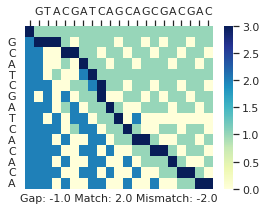

In [54]:
#WYŚWIETLENIE DANYCH
heatmap = makeHeatmap(aligment, " " + dna1," " + dna2, gap, match, mismatch)

In [55]:
#ZAPIS DANYCH
saveStringsAligment(output)
saveDotPlotToFile("mapa", heatmap)